### 📌 **Downloading and Saving the Weather Prediction Dataset**

This Jupyter Notebook section is responsible for **downloading and storing the weather prediction dataset** and its associated metadata. The dataset originates from the [Weather Prediction Dataset on GitHub](https://github.com/florian-huber/weather_prediction_dataset).

* * *

## **📂 Steps in the Script**

The script follows a structured approach to **check, download, and save** the required files in a specific location.

### **1️⃣ Define URLs**

-   The script specifies two URLs:
    -   📄 **Dataset URL:** Contains the CSV file with weather data.
    -   📜 **Metadata URL:** Provides descriptive information about the dataset.

### **2️⃣ Set Up Storage Location**

-   The dataset and metadata are stored in the `datasets` folder.
-   Since the script runs in a subdirectory, it **backs out twice (`../../`)** before saving the files in the `"datasets"` directory.

### **3️⃣ Ensure the Directory Exists**

-   The `os.makedirs(folder_path, exist_ok=True)` command ensures the `"datasets"` folder exists.
-   If the folder is missing, it is created automatically.

### **4️⃣ Check If Files Already Exist**

-   Before downloading, the script **checks if the dataset and metadata file already exist.**
-   **If a file exists, it is skipped** to avoid redundant downloads.

### **5️⃣ Download the Dataset (If Missing)**

-   If the dataset is **not found**, it is downloaded using `pandas.read_csv(url)`.
-   The data is then **saved** to the `"datasets"` folder using `to_csv()`.

### **6️⃣ Download the Metadata File (If Missing)**

-   The metadata file is downloaded using `requests.get(url)`, and the text is saved.
-   If the request fails, an error message is displayed.

* * *

## **🛠️ How This Script Improves Efficiency**

✅ **Prevents unnecessary re-downloading** – Saves bandwidth and speeds up execution.  
✅ **Automatically organizes files** – Ensures data is stored in a structured format.  
✅ **Handles missing folders gracefully** – Avoids manual folder creation.  
✅ **Gives clear messages** – Prints whether files are downloaded or already exist.

* * *

## **📌 Expected Output**

Depending on whether files already exist, the script will output:

✔ **If files are missing (first run):**

`Downloading dataset... Dataset saved at: ../../datasets/weather_prediction_dataset.csv Downloading metadata file... Metadata saved at: ../../datasets/metadata.txt`


✔ **If files already exist:**

`Dataset already exists at: ../../datasets/weather_prediction_dataset.csv, skipping download. Metadata already exists at: ../../datasets/metadata.txt, skipping download.`

* * *



In [2]:
import pandas as pd
import os
import requests

# Define URLs for dataset and metadata
dataset_url = "https://raw.githubusercontent.com/florian-huber/weather_prediction_dataset/main/dataset/weather_prediction_dataset.csv"
metadata_url = "https://raw.githubusercontent.com/florian-huber/weather_prediction_dataset/main/dataset/metadata.txt"

# Define folder path (back out twice and save in "datasets")
folder_path = "../../datasets/mod_2_supervised_learning_data"


# Ensure the "datasets" directory exists
os.makedirs(folder_path, exist_ok=True)

# Define file paths
csv_file_path = os.path.join(folder_path, "weather_prediction_dataset.csv")
metadata_file_path = os.path.join(folder_path, "metadata.txt")

# Check if dataset CSV already exists
if not os.path.exists(csv_file_path):
    print("Downloading dataset...")
    weather_data = pd.read_csv(dataset_url)
    weather_data.to_csv(csv_file_path, index=False)
    print(f"Dataset saved at: {csv_file_path}")
else:
    print(f"Dataset already exists at: {csv_file_path}, skipping download.")

# Check if metadata file already exists
if not os.path.exists(metadata_file_path):
    print("Downloading metadata file...")
    response = requests.get(metadata_url)
    if response.status_code == 200:
        with open(metadata_file_path, "w", encoding="utf-8") as file:
            file.write(response.text)
        print(f"Metadata saved at: {metadata_file_path}")
    else:
        print("Failed to download metadata file.")
else:
    print(f"Metadata already exists at: {metadata_file_path}, skipping download.")


Dataset already exists at: ../../datasets/mod_2_supervised_learning_data\weather_prediction_dataset.csv, skipping download.
Metadata already exists at: ../../datasets/mod_2_supervised_learning_data\metadata.txt, skipping download.


***

## **🎯 Next Steps**

Now that we have the dataset stored locally, we can proceed with **exploring, preprocessing, and training a Decision Tree model** for weather prediction! 🚀

***

### Weather Data Processing and Wind Gust Prediction

#### Data Inspection and Preprocessing
- **Display missing values**: Identifies missing values in the dataset.
- **Check column data types**: Ensures correct data type assignments.
- **Summary statistics**: Provides insights into the dataset’s numerical distributions.
- **Date column verification**: Confirms the correct data type of the `DATE` column.

#### Feature Engineering
- **Target selection**: `DE_BILT_wind_gust` is chosen as the prediction target (`y`).
- **Feature selection**: Drops all columns related to "DE_BILT" from `X` to avoid data leakage.
- **Cyclical encoding**: Converts `MONTH` into `MONTH_sin` and `MONTH_cos` for better seasonal pattern representation.
- **Feature removal**: Drops `MONTH` and `DATE` from `X`.

#### Model Training and Feature Importance
- **Random Forest Model**: Trained to assess feature importance.
- **Feature importance analysis**: Determines the significance of `MONTH_sin` and `MONTH_cos`.
- **Top feature selection**: Identifies the minimum number of features required to explain 95% of feature importance.

#### Model Evaluation
- **Train-test split**: Splits data into training (80%) and testing (20%) sets.
- **Random Forest Regression**: Fits a model to predict wind gusts.
- **Performance metrics**: Calculates:
  - **Mean Absolute Error (MAE)**
  - **Mean Squared Error (MSE)**
  - **R² Score** to evaluate model accuracy.


In [1]:
import pandas as pd

# Define file path
csv_file_path = "../..//datasets/mod_2_supervised_learning_data/weather_prediction_dataset.csv"

# Load dataset from local storage
weather_data = pd.read_csv(csv_file_path)

# View dataset structure
print(weather_data.head())  # Display first 5 rows
print(weather_data.info())  # Show dataset summary


       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ..

In [15]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all 
from IPython.display import display


In [16]:
# Display all missing values in a readable format
display(weather_data.isnull().sum())

DATE                           0
MONTH                          0
BASEL_cloud_cover              0
BASEL_humidity                 0
BASEL_pressure                 0
BASEL_global_radiation         0
BASEL_precipitation            0
BASEL_sunshine                 0
BASEL_temp_mean                0
BASEL_temp_min                 0
BASEL_temp_max                 0
BUDAPEST_cloud_cover           0
BUDAPEST_humidity              0
BUDAPEST_pressure              0
BUDAPEST_global_radiation      0
BUDAPEST_precipitation         0
BUDAPEST_sunshine              0
BUDAPEST_temp_mean             0
BUDAPEST_temp_max              0
DE_BILT_cloud_cover            0
DE_BILT_wind_speed             0
DE_BILT_wind_gust              0
DE_BILT_humidity               0
DE_BILT_pressure               0
DE_BILT_global_radiation       0
DE_BILT_precipitation          0
DE_BILT_sunshine               0
DE_BILT_temp_mean              0
DE_BILT_temp_min               0
DE_BILT_temp_max               0
DRESDEN_cl

In [17]:
# Display column names and their data types
display(weather_data.dtypes)

DATE                             int64
MONTH                            int64
BASEL_cloud_cover                int64
BASEL_humidity                 float64
BASEL_pressure                 float64
BASEL_global_radiation         float64
BASEL_precipitation            float64
BASEL_sunshine                 float64
BASEL_temp_mean                float64
BASEL_temp_min                 float64
BASEL_temp_max                 float64
BUDAPEST_cloud_cover             int64
BUDAPEST_humidity              float64
BUDAPEST_pressure              float64
BUDAPEST_global_radiation      float64
BUDAPEST_precipitation         float64
BUDAPEST_sunshine              float64
BUDAPEST_temp_mean             float64
BUDAPEST_temp_max              float64
DE_BILT_cloud_cover              int64
DE_BILT_wind_speed             float64
DE_BILT_wind_gust              float64
DE_BILT_humidity               float64
DE_BILT_pressure               float64
DE_BILT_global_radiation       float64
DE_BILT_precipitation    

In [18]:
display(weather_data.describe())


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_wind_gust,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_wind_gust,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MALMO_wind_speed,MALMO_precipitation,MALMO_temp_mean,MALMO_temp_min,MALMO_temp_max,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,MUENCHEN_cloud_cover,MUENCHEN_wind_speed,MUENCHEN_wind_gust,MUENCHEN_humidity,MUENCHEN_pressure,MUENCHEN_global_radiation,MUENCHEN_precipitation,MUENCHEN_sunshine,MUENCHEN_temp_mean,MUENCHEN_temp_min,MUENCHEN_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.00000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.0000

In [19]:
# weather_data["DATE"] = pd.to_datetime(weather_data["DATE"], format="%Y%m%d")

# Check the data type of the "DATE" column
print(weather_data.dtypes["DATE"])
print(weather_data["DATE"].head())


int64
0    20000101
1    20000102
2    20000103
3    20000104
4    20000105
Name: DATE, dtype: int64


In [20]:
import numpy as np 

# Define the target city and variable
target_city = "DE_BILT"
target_variable = f"{target_city}_wind_gust"

# Dynamically generate a list of all columns related to the target city in order to drop them
city_columns = [col for col in weather_data.columns if col.startswith(target_city)]

# Define features (X) and target (y)
X = weather_data.drop(columns=city_columns)  # Drop all columns of the target city
y = weather_data[target_variable]  # Target: De Bilt's wind gust


# Apply cyclical encoding of MONTH only to X
X["MONTH_sin"] = np.sin(2 * np.pi * X["MONTH"] / 12)
X["MONTH_cos"] = np.cos(2 * np.pi * X["MONTH"] / 12)

# Drop the original MONTH column from X, keeping weather_data unchanged
X.drop(columns=["MONTH"], inplace=True)

# Drop the DATE column from X, keeping weather_data unchanged
X.drop(columns=["DATE"], inplace=True)


# Print to verify
print(f"Dropped columns: {city_columns}")
print(f"Target variable: {target_variable}")


Dropped columns: ['DE_BILT_cloud_cover', 'DE_BILT_wind_speed', 'DE_BILT_wind_gust', 'DE_BILT_humidity', 'DE_BILT_pressure', 'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine', 'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max']
Target variable: DE_BILT_wind_gust


In [21]:
print("X Shape:", X.shape)
print("y Shape:", y.shape)

print("\nColumns in X:")
print(X.columns)

print("\nFirst few rows of X:")
print(X.head())

print("\nFirst few values of y:")
print(y.head())

X Shape: (3654, 154)
y Shape: (3654,)

Columns in X:
Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BUDAPEST_cloud_cover',
       ...
       'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure',
       'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean',
       'TOURS_temp_min', 'TOURS_temp_max', 'MONTH_sin', 'MONTH_cos'],
      dtype='object', length=154)

First few rows of X:
   BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  8            0.89          1.0286                    0.20   
1                  8            0.87          1.0318                    0.25   
2                  5            0.81          1.0314                    0.50   
3                  7            0.79          1.0262                    0.63   
4                  5            0.90     

In [22]:
print(f"Checking if columns from {target_city} are still in X...")
remaining_target_city_columns = [col for col in X.columns if col.startswith(target_city)]
print("Remaining target city columns:", remaining_target_city_columns)


Checking if columns from DE_BILT are still in X...
Remaining target city columns: []


In [23]:
if "MONTH" in X.columns:
    print("❌ MONTH column was NOT dropped from X.")
else:
    print("✅ MONTH column was successfully dropped from X.")

if "DATE" in X.columns:
    print("❌ DATE column was NOT dropped from X.")
else:
    print("✅ DATE column was successfully dropped from X.")

if "MONTH_sin" in X.columns and "MONTH_cos" in X.columns:
    print("✅ MONTH_sin and MONTH_cos were successfully added to X.")
else:
    print("❌ MONTH_sin and/or MONTH_cos are missing.")


✅ MONTH column was successfully dropped from X.
✅ DATE column was successfully dropped from X.
✅ MONTH_sin and MONTH_cos were successfully added to X.


In [24]:
print(f"Unique values in target variable ({target_variable}):", y.nunique())

Unique values in target variable (DE_BILT_wind_gust): 27


In [25]:
print(y.value_counts())  # Shows unique values and how often they appear

DE_BILT_wind_gust
10.0    436
8.0     432
9.0     431
7.0     403
11.0    350
12.0    289
6.0     287
13.0    213
14.0    161
5.0     160
15.0    112
16.0     93
4.0      74
17.0     66
18.0     38
19.0     33
3.0      24
21.0     15
20.0     14
24.0      6
22.0      5
27.0      4
28.0      3
25.0      2
26.0      1
23.0      1
2.0       1
Name: count, dtype: int64


In [26]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Fit a random forest model to determine feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importances = pd.Series(model.feature_importances_, index=X.columns)


KeyboardInterrupt: 

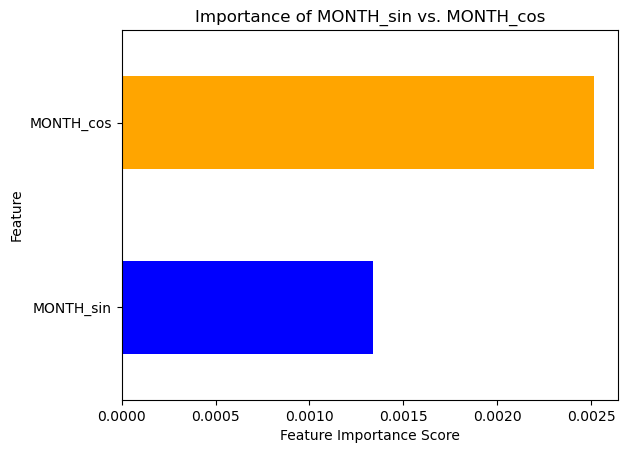

In [ ]:
import matplotlib.pyplot as plt

# Extract individual feature importances
month_features = feature_importances.loc[["MONTH_sin", "MONTH_cos"]]

# Plot
month_features.plot(kind="barh", color=["blue", "orange"])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Importance of MONTH_sin vs. MONTH_cos")
plt.show()

In [ ]:

# Combine importance of MONTH_sin and MONTH_cos
# month_importance = feature_importances.get("MONTH_sin", 0) + feature_importances.get("MONTH_cos", 0)

# Add the combined MONTH importance to the feature importance list
# feature_importances["MONTH_combined"] = month_importance

# Remove the individual MONTH_sin and MONTH_cos entries
# feature_importances = feature_importances.drop(["MONTH_sin", "MONTH_cos"], errors="ignore")

# Sort and display top 10 features including the combined MONTH feature
print(feature_importances.sort_values(ascending=False).head(200))

MAASTRICHT_wind_gust           0.595970
DUSSELDORF_wind_gust           0.062786
DUSSELDORF_wind_speed          0.061247
MAASTRICHT_wind_speed          0.038574
KASSEL_wind_gust               0.011858
HEATHROW_humidity              0.005222
OSLO_pressure                  0.004731
MUENCHEN_wind_gust             0.004639
OSLO_wind_gust                 0.004225
MALMO_wind_speed               0.004200
STOCKHOLM_pressure             0.004193
DRESDEN_wind_gust              0.003883
DUSSELDORF_precipitation       0.003260
OSLO_wind_speed                0.003253
KASSEL_wind_speed              0.003196
MUENCHEN_wind_speed            0.003115
PERPIGNAN_wind_speed           0.002992
ROMA_humidity                  0.002719
OSLO_humidity                  0.002586
TOURS_wind_speed               0.002530
MONTH_cos                      0.002517
MAASTRICHT_precipitation       0.002462
MONTELIMAR_wind_speed          0.002426
DRESDEN_wind_speed             0.002417
STOCKHOLM_sunshine             0.002397


In [ ]:
import numpy as np

# Sort features by importance
sorted_features = feature_importances.sort_values(ascending=False)

# Compute cumulative importance
cumulative_importance = np.cumsum(sorted_features)

# Find the number of features needed to explain 95% of total importance
n_features_95 = np.argmax(cumulative_importance >= 0.95) + 1

print(f"Number of features needed to explain 95% of importance: {n_features_95}")

# Select the top features
selected_features = sorted_features[:n_features_95]
print("Selected Features:\n", selected_features)


Number of features needed to explain 95% of importance: 95
Selected Features:
 MAASTRICHT_wind_gust           0.595970
DUSSELDORF_wind_gust           0.062786
DUSSELDORF_wind_speed          0.061247
MAASTRICHT_wind_speed          0.038574
KASSEL_wind_gust               0.011858
HEATHROW_humidity              0.005222
OSLO_pressure                  0.004731
MUENCHEN_wind_gust             0.004639
OSLO_wind_gust                 0.004225
MALMO_wind_speed               0.004200
STOCKHOLM_pressure             0.004193
DRESDEN_wind_gust              0.003883
DUSSELDORF_precipitation       0.003260
OSLO_wind_speed                0.003253
KASSEL_wind_speed              0.003196
MUENCHEN_wind_speed            0.003115
PERPIGNAN_wind_speed           0.002992
ROMA_humidity                  0.002719
OSLO_humidity                  0.002586
TOURS_wind_speed               0.002530
MONTH_cos                      0.002517
MAASTRICHT_precipitation       0.002462
MONTELIMAR_wind_speed          0.002426
D

In [ ]:
# Extract only the feature names
selected_feature_names = selected_features.index.tolist()  # Get a list of column names

# Use them to select columns from X
X_selected = X[selected_feature_names]

# Verify
print(X_selected.columns)  # Should match selected_feature_names


Index(['MAASTRICHT_wind_gust', 'DUSSELDORF_wind_gust', 'DUSSELDORF_wind_speed',
       'MAASTRICHT_wind_speed', 'KASSEL_wind_gust', 'HEATHROW_humidity',
       'OSLO_pressure', 'MUENCHEN_wind_gust', 'OSLO_wind_gust',
       'MALMO_wind_speed', 'STOCKHOLM_pressure', 'DRESDEN_wind_gust',
       'DUSSELDORF_precipitation', 'OSLO_wind_speed', 'KASSEL_wind_speed',
       'MUENCHEN_wind_speed', 'PERPIGNAN_wind_speed', 'ROMA_humidity',
       'OSLO_humidity', 'TOURS_wind_speed', 'MONTH_cos',
       'MAASTRICHT_precipitation', 'MONTELIMAR_wind_speed',
       'DRESDEN_wind_speed', 'STOCKHOLM_sunshine', 'TOURS_pressure',
       'PERPIGNAN_humidity', 'LJUBLJANA_wind_speed', 'ROMA_pressure',
       'BUDAPEST_pressure', 'HEATHROW_pressure', 'SONNBLICK_humidity',
       'PERPIGNAN_global_radiation', 'HEATHROW_global_radiation',
       'LJUBLJANA_humidity', 'KASSEL_precipitation', 'MUENCHEN_humidity',
       'OSLO_precipitation', 'MALMO_temp_min', 'SONNBLICK_global_radiation',
       'BUDAPEST_global

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Model
y_pred = rf_model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Mean Absolute Error: 1.3565088759187598


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

# Predict on test data 
y_pred = rf_model.predict(X_test)  

# Compute error metrics 
mae = mean_absolute_error(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f"Mean Absolute Error (MAE): {mae:.2f}")  
print(f"Mean Squared Error (MSE): {mse:.2f}")  
print(f"R² Score: {r2:.2f}")  

Mean Absolute Error (MAE): 1.36
Mean Squared Error (MSE): 3.24
R² Score: 0.73


***

### Next Steps: Debugging Decision Tree Model

#### Identify and Resolve Issues
- **Assess Model Performance**: Compare training vs. testing accuracy to detect overfitting or underfitting.
- **Optimize Hyperparameters**:
  - Adjust tree depth.
  - Modify the minimum samples per split.
- **Address Data Imbalances**: Ensure balanced training data if necessary to improve model generalization.

***

***

### Decision Tree Visualization and Model Optimization

#### 1. **Visualizing a Decision Tree**
- Selects and plots a tree from the trained random forest model.
- Saves the visualization as a high-resolution image for analysis.

#### 2. **Evaluating Initial Model Performance**
- Computes training and testing accuracy to check for overfitting or underfitting.

#### 3. **Hyperparameter Tuning with Grid Search**
- Uses `GridSearchCV` to find the best combination of:
  - Tree depth (`max_depth`)
  - Minimum samples per split (`min_samples_split`)
  - Minimum leaf size (`min_samples_leaf`)
  - Number of trees (`n_estimators`)
- Outputs the best hyperparameters.

#### 4. **Training an Optimized Random Forest Model**
- Fits a new model using the best parameters.
- Evaluates performance using:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - R² Score

#### 5. **Iterative Model Refinement**
- Adjusts hyperparameters to improve generalization and reduce overfitting.
- Evaluates each iteration using training/testing R² scores.

#### 6. **Cross-Validation for Robustness**
- Performs 5-fold cross-validation to assess model stability.
- Calculates mean R² score to measure generalization across different splits.

#### 7. **Final Model Selection**
- Tests multiple configurations with increasing regularization.
- Selects the model that balances performance and generalization.

***


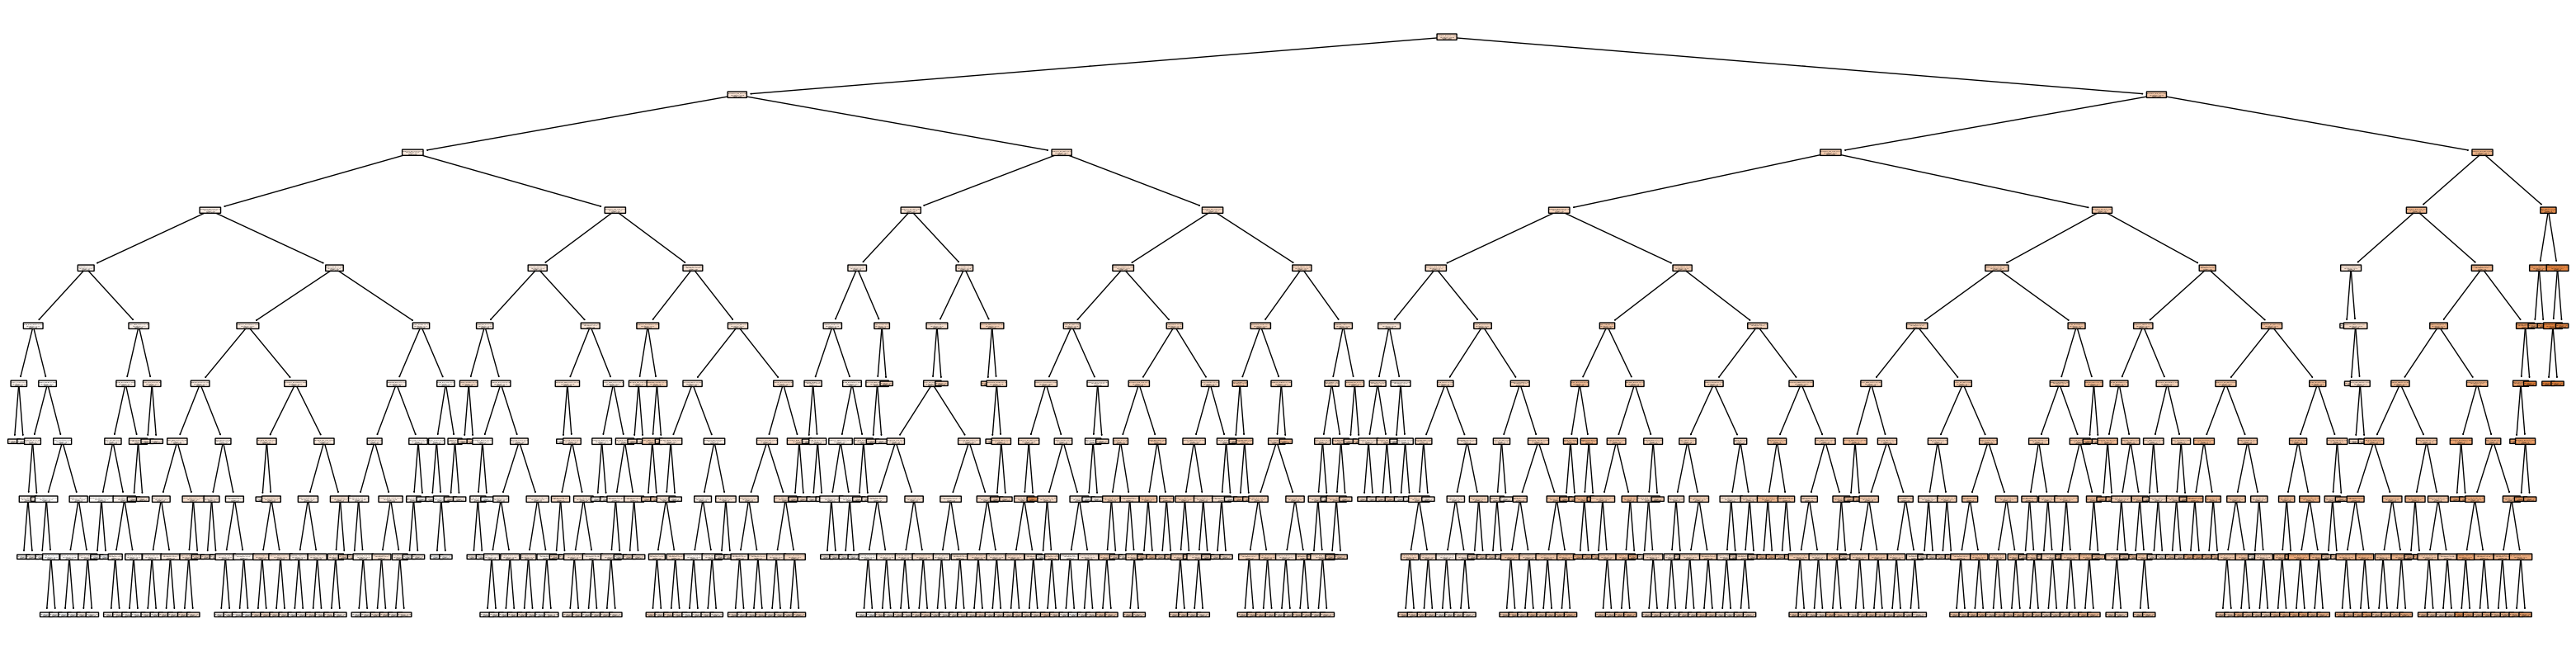

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select a tree from the random forest (e.g., the first tree)
tree_index = 0  # You can change this to visualize other trees
plt.figure(figsize=(40,10))
plot_tree(rf_model.estimators_[tree_index], feature_names=X_selected.columns, filled=True, rounded=True)
plt.savefig("decision_tree.png", dpi=600, bbox_inches="tight")  # Save with high DPI
plt.show()


In [ ]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.94
Testing Accuracy: 0.73


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define updated hyperparameter grid based on StatQuest's recommendations
param_grid = {
    'max_depth': [5, 8, 12],  # Constrain tree depth
    'min_samples_split': [10, 20, 50],  # Ensure fewer splits
    'min_samples_leaf': [5, 10, 15],  # Ensure larger leaf sizes
    'n_estimators': [100, 200, 300]  # Increase tree count for stability
}

# Initialize GridSearchCV with updated hyperparameters
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)  # Use all processors for speed

# Fit GridSearch to find optimal parameters
grid_search.fit(X_train, y_train)

# Output best parameters
print(f"Best Parameters: {grid_search.best_params_}")


In [ ]:
# Train final Random Forest model using the best hyperparameters
best_rf_model = RandomForestRegressor(
    max_depth=12,
    min_samples_leaf=5,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

# Fit the model on the full training data
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = best_rf_model.predict(X_test)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R² Score: {r2:.2f}")  # Higher is better


🔹 Mean Absolute Error (MAE): 1.35
🔹 Mean Squared Error (MSE): 3.26
🔹 R² Score: 0.73


In [ ]:
train_score = best_rf_model.score(X_train, y_train)  # R² on train set
test_score = best_rf_model.score(X_test, y_test)  # R² on test set

print(f"🔹 Training R² Score: {train_score:.2f}")
print(f"🔹 Testing R² Score: {test_score:.2f}")


🔹 Training R² Score: 0.93
🔹 Testing R² Score: 0.73


In [ ]:
best_rf_model = RandomForestRegressor(
    max_depth=8,  # Reduce tree depth
    min_samples_leaf=10,  # Increase leaf size
    min_samples_split=20,  # Require more samples per split
    n_estimators=100,  # Reduce number of trees
    random_state=42
)

# Retrain model
best_rf_model.fit(X_train, y_train)

# Evaluate new scores
train_score = best_rf_model.score(X_train, y_train)
test_score = best_rf_model.score(X_test, y_test)

print(f"🔹 Training R² Score: {train_score:.2f}")
print(f"🔹 Testing R² Score: {test_score:.2f}")


🔹 Training R² Score: 0.87
🔹 Testing R² Score: 0.72


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean():.2f}")


Cross-Validation R² Scores: [0.79620202 0.76516813 0.71921352 0.7806663  0.75223697]
Mean Cross-Validation R² Score: 0.76


In [ ]:
best_rf_model = RandomForestRegressor(
    max_depth=7,  # Reduce tree depth slightly
    min_samples_leaf=15,  # Increase leaf size
    min_samples_split=30,  # Require more samples per split
    n_estimators=100,  # Keep tree count moderate
    random_state=42
)

# Retrain model
best_rf_model.fit(X_train, y_train)

# Evaluate new scores
train_score = best_rf_model.score(X_train, y_train)
test_score = best_rf_model.score(X_test, y_test)

print(f"🔹 Training R² Score: {train_score:.2f}")
print(f"🔹 Testing R² Score: {test_score:.2f}")

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean():.2f}")


🔹 Training R² Score: 0.84
🔹 Testing R² Score: 0.72
Cross-Validation R² Scores: [0.79241481 0.76077287 0.71622531 0.7748918  0.74657694]
Mean Cross-Validation R² Score: 0.76


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Updated hyperparameters to generalize better
best_rf_model = RandomForestRegressor(
    max_depth=7,            # Keep tree depth moderate
    min_samples_leaf=25,    # Increase minimum leaf size (previously 15)
    min_samples_split=40,   # Increase minimum samples to split (previously 30)
    n_estimators=100,       # Keep tree count at 100 for now
    random_state=42
)

# Retrain model
best_rf_model.fit(X_train, y_train)

# Evaluate new scores
train_score = best_rf_model.score(X_train, y_train)
test_score = best_rf_model.score(X_test, y_test)

print(f"🔹 Training R² Score: {train_score:.2f}")
print(f"🔹 Testing R² Score: {test_score:.2f}")

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean():.2f}")


🔹 Training R² Score: 0.82
🔹 Testing R² Score: 0.71
Cross-Validation R² Scores: [0.78672084 0.75344743 0.71448236 0.76992203 0.74516729]
Mean Cross-Validation R² Score: 0.75


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Further improving generalization
better_rf_model = RandomForestRegressor(
    max_depth=7,            # Keep tree depth moderate
    min_samples_leaf=35,    # Increase minimum leaf size
    min_samples_split=50,   # Require more samples per split
    n_estimators=300,       # Increase tree count for stability
    random_state=42
)

# Retrain model
better_rf_model.fit(X_train, y_train)

# Evaluate new scores
train_score = better_rf_model.score(X_train, y_train)
test_score = better_rf_model.score(X_test, y_test)

print(f"🔹 Training R² Score: {train_score:.2f}")
print(f"🔹 Testing R² Score: {test_score:.2f}")

# Cross-validation
cv_scores = cross_val_score(better_rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean():.2f}")


🔹 Training R² Score: 0.80
🔹 Testing R² Score: 0.71
Cross-Validation R² Scores: [0.78026512 0.74878991 0.71181701 0.76066478 0.73764055]
Mean Cross-Validation R² Score: 0.75


***

### Next Steps: Evaluating the Random Forest Regression Model

#### **Performance Assessment**
- **Generate Predictions**: Predict wind gust values using the trained model on the test set.
- **Evaluate Model Metrics**:
  - **Mean Absolute Error (MAE)**: Measures average absolute difference between predictions and actual values.
  - **Mean Squared Error (MSE)**: Penalizes larger errors more heavily.
  - **R² Score**: Indicates how well the model explains variance in the target variable.
- **Analyze Prediction Errors**:
  - Compare actual vs. predicted values to identify systematic errors.
  - Investigate residual distributions for model bias.

***

***

### Model Evaluation and Interpretation

#### **1. Performance Metrics Calculation**
- **Generate Predictions**: Predict wind gust values on the test set.
- **Evaluate Model Performance**:
  - **R² Score**: Measures explained variance.
  - **Mean Absolute Error (MAE)**: Average absolute prediction error.
  - **Mean Squared Error (MSE)**: Penalizes larger errors more heavily.
  - **Root Mean Squared Error (RMSE)**: Square root of MSE for better interpretability.
- **Cross-Validation**: Computes R² scores across multiple training splits for robustness.

#### **2. Visualization of Predictions**
- **Scatter Plot**: Compares actual vs. predicted values, with a reference line to assess accuracy.
- **Residual Plot**: Examines error distribution to detect biases or patterns in prediction errors.

#### **3. Decision Tree Interpretation**
- **Extract Rules**: Prints human-readable decision rules from one of the trained trees in the random forest.
- **Leaf Node Analysis**: Extracts and displays all unique predicted values at the leaf nodes.
- **Prediction Distribution**: Counts occurrences of each unique prediction to understand model output granularity.

***

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = better_rf_model.predict(X_test)

# Compute all evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"🔹 Training R² Score: {better_rf_model.score(X_train, y_train):.2f}")
print(f"🔹 Testing R² Score: {r2:.2f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")

# Cross-validation for R²
cv_scores = cross_val_score(better_rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean():.2f}")


🔹 Training R² Score: 0.80
🔹 Testing R² Score: 0.71
🔹 Mean Absolute Error (MAE): 1.40
🔹 Mean Squared Error (MSE): 3.52
🔹 Root Mean Squared Error (RMSE): 1.88
Cross-Validation R² Scores: [0.78026512 0.74878991 0.71181701 0.76066478 0.73764055]
Mean Cross-Validation R² Score: 0.75


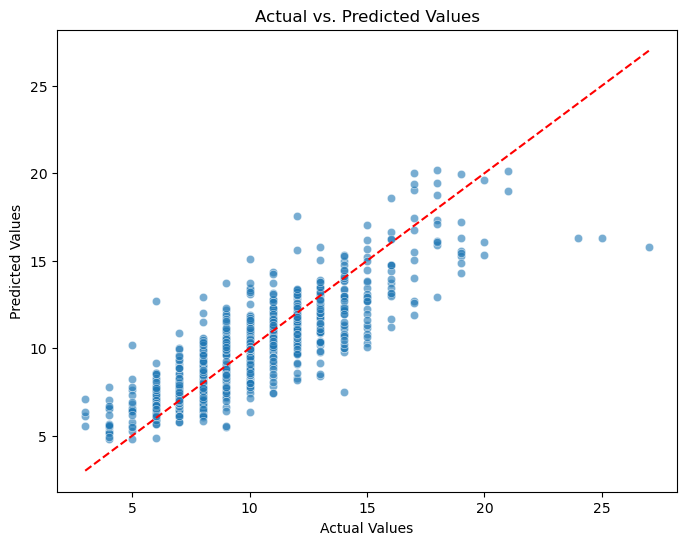

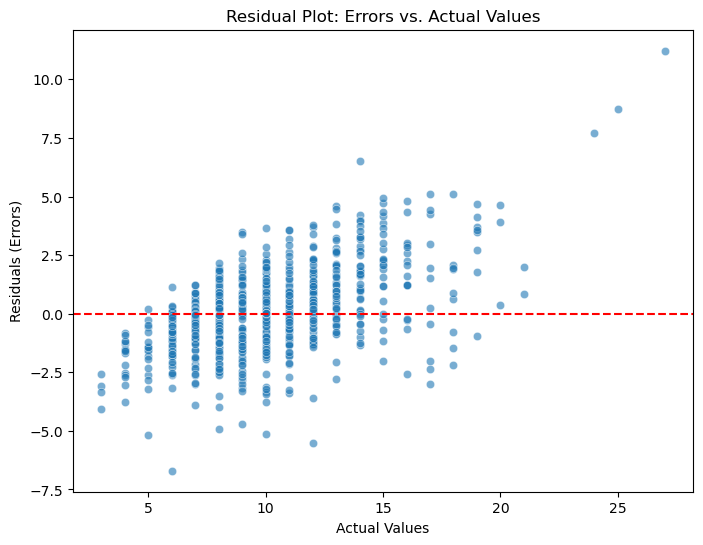

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make Predictions
y_pred = better_rf_model.predict(X_test)

# 📌 Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# 📌 Residual Plot: Errors vs. Actual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Zero error line
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot: Errors vs. Actual Values")
plt.show()


In [ ]:
from sklearn.tree import export_text

# Select a single tree from the random forest (e.g., the first tree)
first_tree = better_rf_model.estimators_[0]

# Print the decision tree in text format
tree_rules = export_text(first_tree, feature_names=list(X_train.columns))
print(tree_rules)


|--- MAASTRICHT_wind_gust <= 12.50
|   |--- MAASTRICHT_wind_gust <= 8.50
|   |   |--- DUSSELDORF_wind_speed <= 2.35
|   |   |   |--- DUSSELDORF_wind_speed <= 1.55
|   |   |   |   |--- value: [4.96]
|   |   |   |--- DUSSELDORF_wind_speed >  1.55
|   |   |   |   |--- DRESDEN_humidity <= 0.81
|   |   |   |   |   |--- DUSSELDORF_precipitation <= 0.00
|   |   |   |   |   |   |--- OSLO_pressure <= 1.01
|   |   |   |   |   |   |   |--- value: [7.10]
|   |   |   |   |   |   |--- OSLO_pressure >  1.01
|   |   |   |   |   |   |   |--- value: [6.30]
|   |   |   |   |   |--- DUSSELDORF_precipitation >  0.00
|   |   |   |   |   |   |--- value: [7.50]
|   |   |   |   |--- DRESDEN_humidity >  0.81
|   |   |   |   |   |--- OSLO_temp_min <= 2.50
|   |   |   |   |   |   |--- value: [5.66]
|   |   |   |   |   |--- OSLO_temp_min >  2.50
|   |   |   |   |   |   |--- value: [6.49]
|   |   |--- DUSSELDORF_wind_speed >  2.35
|   |   |   |--- MAASTRICHT_wind_speed <= 2.65
|   |   |   |   |--- OSLO_global_radia

In [ ]:
import numpy as np
from sklearn.tree import _tree

# Select the first tree from the RandomForestRegressor
first_tree = better_rf_model.estimators_[0]

# Access the tree structure
tree = first_tree.tree_

# Extract all predicted values at the leaf nodes
leaf_indices = np.where(tree.children_left == -1)[0]  # Get indices of leaf nodes
predicted_values = tree.value[leaf_indices].flatten()  # Extract values

# Print unique predicted values
unique_predictions = np.unique(predicted_values)
print("All Unique Predicted Values:", unique_predictions)


All Unique Predicted Values: [ 4.96153846  5.65625     6.3030303   6.40196078  6.48979592  7.09615385
  7.275       7.32142857  7.5         7.73913043  7.8627451   8.33823529
  8.62337662  8.68333333  8.9047619   8.95384615  9.07142857  9.26923077
  9.40740741  9.85074627 10.12720848 10.19354839 10.66071429 10.94117647
 11.23188406 11.24137931 11.32727273 11.82222222 12.14814815 12.3015873
 12.91780822 14.02702703 14.05454545 14.25       15.88421053 16.54205607
 20.45901639]


In [ ]:
from collections import Counter
prediction_counts = Counter(predicted_values)
print("Prediction Counts:", prediction_counts)


Prediction Counts: Counter({np.float64(4.961538461538462): 1, np.float64(7.096153846153846): 1, np.float64(6.303030303030303): 1, np.float64(7.5): 1, np.float64(5.65625): 1, np.float64(6.489795918367347): 1, np.float64(6.401960784313726): 1, np.float64(7.739130434782608): 1, np.float64(7.321428571428571): 1, np.float64(7.862745098039215): 1, np.float64(8.683333333333334): 1, np.float64(9.071428571428571): 1, np.float64(7.275): 1, np.float64(8.338235294117647): 1, np.float64(8.953846153846154): 1, np.float64(8.623376623376624): 1, np.float64(9.850746268656716): 1, np.float64(8.904761904761905): 1, np.float64(9.26923076923077): 1, np.float64(10.12720848056537): 1, np.float64(11.231884057971014): 1, np.float64(11.327272727272728): 1, np.float64(12.301587301587302): 1, np.float64(10.660714285714286): 1, np.float64(10.193548387096774): 1, np.float64(11.241379310344827): 1, np.float64(9.407407407407407): 1, np.float64(14.25): 1, np.float64(12.148148148148149): 1, np.float64(10.94117647058823